Today we will look at [matplotlib](http://matplotlib.org/), which is "a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms".

In [1]:
import numpy as np

In [2]:
np.random.seed(1111)  # set the seed so that notebook behaves predictably

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

Next we use ipython magic command `%matplotlib inline` to produce all plots inline in a notebook.

In [5]:
%matplotlib inline

In [6]:
x_vals = np.arange(1, 11)

In [7]:
y_vals = x_vals ** 2

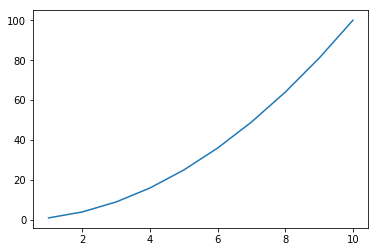

In [8]:
plt.plot(x_vals, y_vals)  

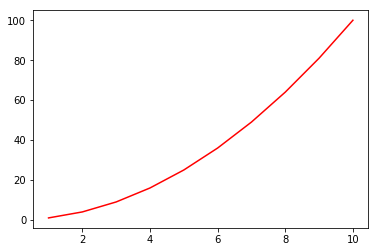

In [9]:
# just want to ignore the object returned by plot(), so assigning it to _
_ = plt.plot(x_vals, y_vals, '-r')  # red line, default is blue line

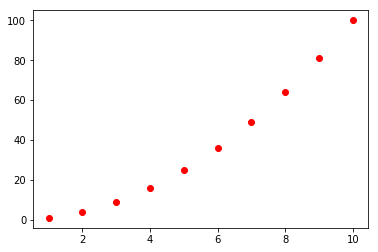

In [10]:
_ = plt.plot(x_vals, y_vals, 'or')  # red circles

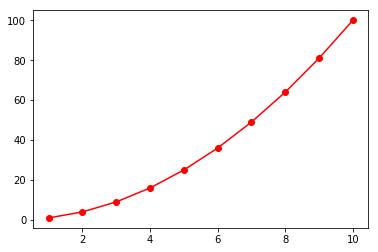

In [11]:
_ = plt.plot(x_vals, y_vals, '-or')  # red line with circles

For more information on line styles and format strings, go [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

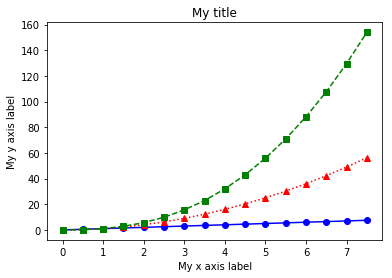

In [12]:
x_vals = np.arange(0, 8, .5)
plt.xlabel("My x axis label")  # set the axes labels
plt.ylabel("My y axis label")
plt.title("My title")  # set the plot title
_ = plt.plot(x_vals, x_vals, '-ob', x_vals, x_vals**2, ':^r', x_vals, x_vals**2.5, '--sg')

Let us make a simple histrogram (with 50 bins) from a sample drawn from an expontial distribution with parameter 0.5 (this corresponds to a scale parameter of 2).

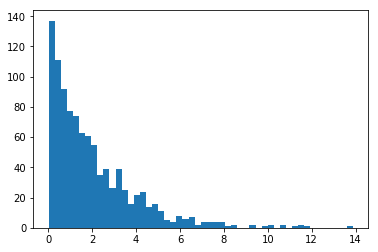

In [13]:
samples = np.random.exponential(size=1000, scale=2)  # 1000 draws from exponential(0.5)
n, bins, patches = plt.hist(samples, bins=50)

In [14]:
print n  # the counts within each bin

[ 137.  111.   92.   77.   74.   63.   61.   55.   35.   39.   26.   39.
   25.   16.   22.   24.   14.   16.   11.    5.    4.    8.    6.    7.
    2.    4.    4.    4.    4.    1.    2.    0.    0.    2.    0.    1.
    2.    0.    2.    0.    1.    2.    1.    0.    0.    0.    0.    0.
    0.    1.]


Let us learn to add gridlines and to add text at arbitrary places in the plot.

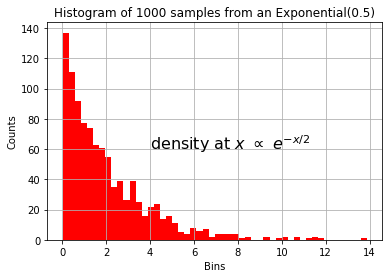

In [16]:
plt.grid(True)  # draw the grid in the background
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Histogram of 1000 samples from an Exponential(0.5)')
plt.text(4, 60, r'density at $x$ $\propto\ e^{-x/2}$', fontsize=16)  # add text at specified position (note use of raw string)
_ = plt.hist(samples, bins=50, facecolor='r')  # use red instead of the blue default

We can annotate plots using the `annotate()` function.

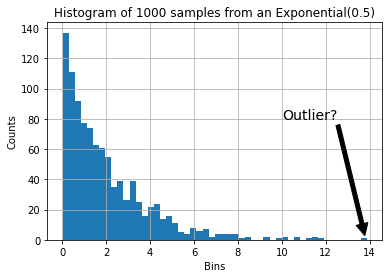

In [17]:
plt.grid(True)  # draw the grid in the background
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Histogram of 1000 samples from an Exponential(0.5)')
# annotate is great for annotating parts of the plot
plt.annotate('Outlier?', (13.8, 2), (10, 80),  # position (14.6, 2) is being annotated by text at (10, 80)
             fontsize=14, arrowprops={'facecolor':'black', 'shrink':0.01})
_ = plt.hist(samples, bins=50)

It is also easy to create legends using `legend()`.

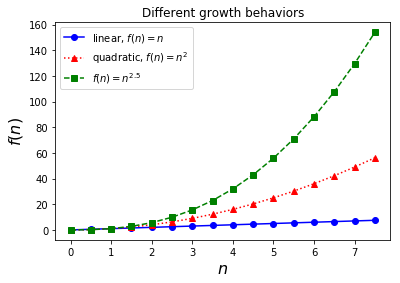

In [18]:
x_vals = np.arange(0, 8, .5)
plt.xlabel("$n$", fontsize=16)  # set the axes labels
plt.ylabel("$f(n)$", fontsize=16)
plt.title("Different growth behaviors")  # set the plot title
plt.plot(x_vals, x_vals, '-ob', label='linear, $f(n)=n$')
plt.plot(x_vals, x_vals**2, ':^r', label='quadratic, $f(n)=n^2$')
plt.plot(x_vals, x_vals**2.5, '--sg', label='$f(n)=n^{2.5}$')
_ = plt.legend(loc='best')  # places legend at best location, uses labels from above

Let us now create a plot with subplots.

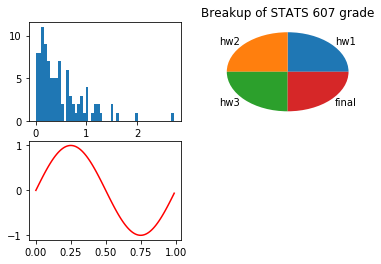

In [19]:
fig = plt.figure()   # create an empty figure
sp1 = fig.add_subplot(2, 2, 1)  # we'll be creating a 2x2 plot table and we're selecting the 1st
sp2 = fig.add_subplot(2, 2, 2)  # 2nd one
sp3 = fig.add_subplot(2, 2, 3)  # 3rd one
x_vals = np.arange(0, 1, .01)
plt.plot(x_vals, np.sin(2*np.pi*x_vals), '-r')  # plot draws on last figure and subplot used (or creates one if none exist)
_ = sp1.hist(np.random.exponential(.5, size=100), bins=50)  # put a histogram on subplot 1
_ = sp2.pie([25, 25, 25, 25], labels=['hw1', 'hw2', 'hw3', 'final'])  # put a pie-chart on subplot 2
_ = sp2.set_title('Breakup of STATS 607 grade')  # set title of the pie-chart

Let us see how to save plots in different file formats.

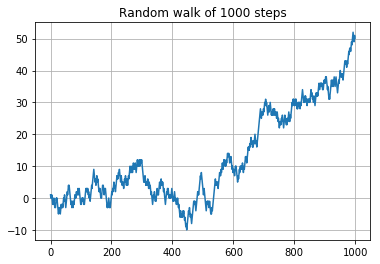

In [20]:
random_signs = np.sign(np.random.rand(1000)-0.5)
plt.grid(True)
plt.title('Random walk of 1000 steps')
_ = plt.plot(np.cumsum(random_signs))  # cumsum() returns cumulative sums
plt.savefig('random_walk.svg')

We saved the plot in SVG ([Scalable Vector Graphics](http://en.wikipedia.org/wiki/Scalable_Vector_Graphics)) format. The saved image can be accessed [here](http://dept.stat.lsa.umich.edu/~tewaria/teaching/STATS607A-Fall2015/random_walk.svg). `savefig` guesses the file format from the extension. So if we wanted to save, say in PDF and PNG formats, we could say:

    plt.savefig('random_walk.pdf')
    plt.savefig('random_walk.png')

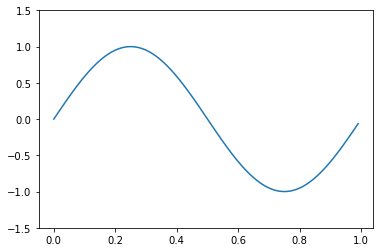

In [21]:
import matplotlib.animation as animation

x_vals = np.arange(0, 1, .01)
fig, ax = plt.subplots()
line, = ax.plot(x_vals, np.sin(2*np.pi*x_vals))
ax.set_ylim([-1.5, 1.5])

def update(shift):
    line.set_ydata(np.sin(2*np.pi*(x_vals+shift)))
    return line,

ani = animation.FuncAnimation(fig, update, np.arange(0, 1, .01), interval=50)
ani.save('anim.mp4')

You can watch the animation as a Youtube video [here](http://youtu.be/bRiooD6DK_s).